### 계절성 데이터의 ACF, PACF 확인

1958-03-31    316.100000
1958-04-30    317.200000
1958-05-31    317.433333
1958-07-31    315.625000
1958-08-31    314.950000
                 ...    
2001-08-31    369.425000
2001-09-30    367.880000
2001-10-31    368.050000
2001-11-30    369.375000
2001-12-31    371.020000
Name: co2, Length: 521, dtype: float64
DatetimeIndex(['1958-03-31', '1958-04-30', '1958-05-31', '1958-07-31',
               '1958-08-31', '1958-09-30', '1958-11-30', '1958-12-31',
               '1959-01-31', '1959-02-28',
               ...
               '2001-03-31', '2001-04-30', '2001-05-31', '2001-06-30',
               '2001-07-31', '2001-08-31', '2001-09-30', '2001-10-31',
               '2001-11-30', '2001-12-31'],
              dtype='datetime64[ns]', length=521, freq=None)


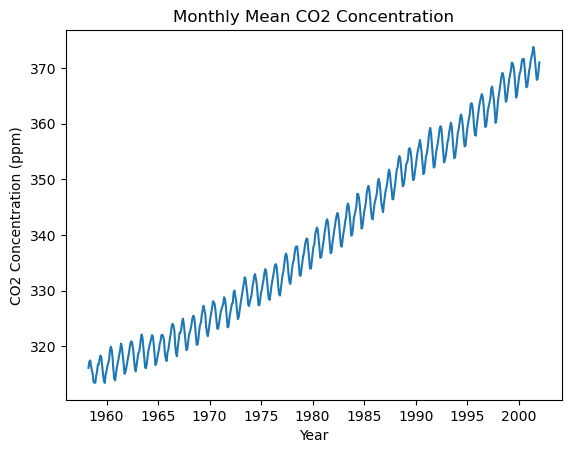

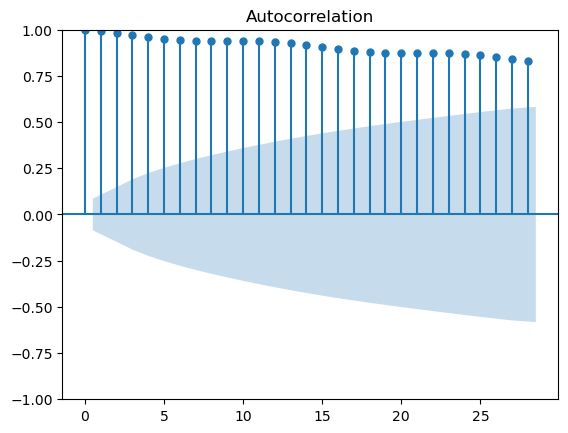

C:\Anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


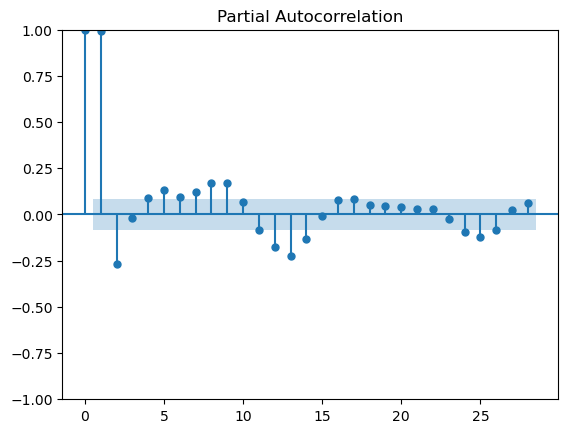

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load the data into a Pandas DataFrame
data = sm.datasets.co2.load_pandas()
df = data.data

# Convert the data to a time series format
ts = df['co2'].resample('M').mean()

ts=ts.dropna()

# Plot the time series data
plt.plot(ts)
plt.xlabel("Year")
plt.ylabel("CO2 Concentration (ppm)")
plt.title("Monthly Mean CO2 Concentration")
plt.show()

# Plot the ACF and PACF of the time series data
sm.graphics.tsa.plot_acf(ts)
plt.show()
sm.graphics.tsa.plot_pacf(ts)
plt.show()


In [56]:
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX

#Set Train size as 90% of total data
train_size = int(len(ts)*0.9)

#split into train data and test data
train_data = ts[:train_size]
test_data = ts[train_size:]

# Fit the SARIMA model to the training data
model = SARIMAX(train_data, order=(1,1,1), seasonal_order=(0,1,1,12))
results = model.fit()

# Use the SARIMA model to make predictions for the testing data
predictions = results.predict(start=ts.index[0],end=ts.index[-1],dynamic=False)

# Plot the actual and predicted values for the testing data
plt.plot(predictions, label="SARIMA model",linewidth=2)
plt.plot(train_data, label="Train data")
plt.plot(test_data, label="Actual Values")
plt.xlabel("Year")
plt.ylabel("CO2 Concentration (ppm)")
plt.title("SARIMA Model")
plt.legend()
plt.show()


C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


KeyError: 'The `end` argument could not be matched to a location related to the index of the data.'

In [55]:
ts.index[train_size:]

DatetimeIndex(['1997-08-31', '1997-09-30', '1997-10-31', '1997-11-30',
               '1997-12-31', '1998-01-31', '1998-02-28', '1998-03-31',
               '1998-04-30', '1998-05-31', '1998-06-30', '1998-07-31',
               '1998-08-31', '1998-09-30', '1998-10-31', '1998-11-30',
               '1998-12-31', '1999-01-31', '1999-02-28', '1999-03-31',
               '1999-04-30', '1999-05-31', '1999-06-30', '1999-07-31',
               '1999-08-31', '1999-09-30', '1999-10-31', '1999-11-30',
               '1999-12-31', '2000-01-31', '2000-02-29', '2000-03-31',
               '2000-04-30', '2000-05-31', '2000-06-30', '2000-07-31',
               '2000-08-31', '2000-09-30', '2000-10-31', '2000-11-30',
               '2000-12-31', '2001-01-31', '2001-02-28', '2001-03-31',
               '2001-04-30', '2001-05-31', '2001-06-30', '2001-07-31',
               '2001-08-31', '2001-09-30', '2001-10-31', '2001-11-30',
               '2001-12-31'],
              dtype='datetime64[ns]', freq=None